In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

TRAINING_PATH = './objects/real_augmented/training/semantic_labels/'
VALIDATION_PATH = './objects/real_augmented/validation/semantic_labels/'
TEST_PATH = './objects/real_augmented/test/semantic_labels/'

In [2]:
def get_file_paths(root_paths):
    file_paths = []
    for file in os.listdir(root_paths):
        file_paths.append(os.path.join(root_paths,file))
    return file_paths

In [3]:
train_files = get_file_paths(TRAINING_PATH)
validation_files = get_file_paths(VALIDATION_PATH)
test_files = get_file_paths(TEST_PATH)

In [4]:
def create_variant_labels(original_files, save_path, variant_type='full'):
    
    for file in original_files:
        img = cv2.imread(file, 0)
        if variant_type == 'full':
            img[img==19] = 0
        elif variant_type == 'binary':
            img[img==19] = 0
            img[img!=0] = 1
        elif variant_type == 'similar_shapes':
            img[img==19] = 0
            img[img==2] = 1
            img[img==3] = 1
            img[img==4] = 1
            img[img==5] = 2
            img[img==6] = 3
            img[img==7] = 3
            img[img==8] = 4
            img[img==9] = 5
            img[img==16] = 5
            img[img==10] = 6
            img[img==11] = 7
            img[img==12] = 8
            img[img==13] = 9
            img[img==14] = 10
            img[img==15] = 10
            img[img==17] = 11
            img[img==18] = 12
        elif variant_type == 'size_invariant':
            img[img==19] = 0
            img[img==2] = 1
            img[img==3] = 2
            img[img==4] = 2
            img[img==5] = 3
            img[img==6] = 4
            img[img==7] = 4
            img[img==8] = 5
            img[img==9] = 6
            img[img==16] = 6
            img[img==10] = 7
            img[img==11] = 8
            img[img==12] = 9
            img[img==13] = 10
            img[img==14] = 11
            img[img==15] = 12
            img[img==17] = 13
            img[img==18] = 14
        
        name = file.split('/')[-1]
        cv2.imwrite(os.path.join(save_path, name), img)

In [5]:
def plot_sample(files, img_number=0):
    label = cv2.imread(files[img_number], 0)
    img_path = files[img_number].split('/')[:-2]
    img_name = files[img_number].split('/')[-1]
    img_name = img_name.split('.')[0]
    img_path = '/'.join(img_path)
    img = cv2.imread(os.path.join(img_path, 'image', img_name+'.jpg'), 1)
    print ('Classes in image: ', np.unique(label))
    figure = plt.figure(figsize=(10,10))
    figure.add_subplot(121)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    figure.add_subplot(122)
    plt.imshow(label)
    plt.show()

In [6]:
label_def = {'background': 0, 'f20_20_B': 1, 's40_40_B': 2, 'f20_20_G': 3, 's40_40_G': 4,  
             'm20_100': 5, 'm20': 6, 'm30': 7, 'r20': 8, 'bearing_box_ax01': 9, 'bearing': 10, 'axis': 11, 
             'distance_tube': 12, 'motor': 13, 'container_box_blue': 14, 'container_box_red': 15, 
             'bearing_box_ax16': 16, 'em_01': 17, 'em_02': 18}

In [7]:
FULL_TRAIN = './objects/real_augmented/training/full/'
FULL_VALIDATE = './objects/real_augmented/validation/full/'
FULL_TEST = './objects/real_augmented/test/full/'

if not os.path.isdir(FULL_TRAIN):
    os.makedirs(FULL_TRAIN)
if not os.path.isdir(FULL_VALIDATE):
    os.makedirs(FULL_VALIDATE)
if not os.path.isdir(FULL_TEST):
    os.makedirs(FULL_TEST)
create_variant_labels(train_files, FULL_TRAIN, variant_type='full')
create_variant_labels(validation_files, FULL_VALIDATE, variant_type='full')
create_variant_labels(test_files, FULL_TEST, variant_type='full')

Classes in image:  [ 0  1  6 10 17]


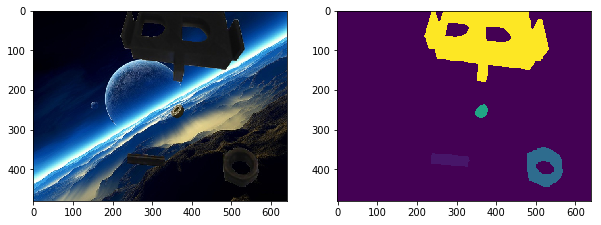

In [8]:
full_files = get_file_paths(FULL_TRAIN)
plot_sample(full_files, img_number=20)

In [9]:
BINARY_TRAIN = './objects/real_augmented/training/binary/'
BINARY_VALIDATE = './objects/real_augmented/validation/binary/'
BINARY_TEST = './objects/real_augmented/test/binary/'

if not os.path.isdir(BINARY_TRAIN):
    os.makedirs(BINARY_TRAIN)
if not os.path.isdir(BINARY_VALIDATE):
    os.makedirs(BINARY_VALIDATE)
if not os.path.isdir(BINARY_TEST):
    os.makedirs(BINARY_TEST)
create_variant_labels(train_files, BINARY_TRAIN, variant_type='binary')
create_variant_labels(validation_files, BINARY_VALIDATE, variant_type='binary')
create_variant_labels(test_files, BINARY_TEST, variant_type='binary')

Classes in image:  [0 1]


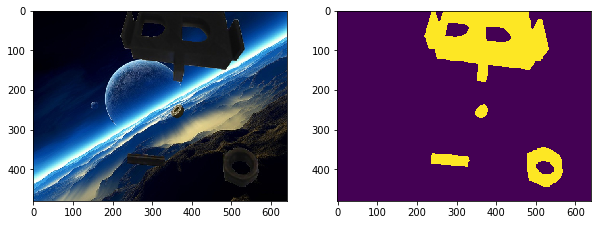

In [10]:
binary_files = get_file_paths(BINARY_TRAIN)
plot_sample(binary_files, img_number=20)

In [11]:
label_def_similar_shapes = {'background': 0, 'f20_20_B': 1, 'f20_20_G': 1, 's40_40_B': 1, 's40_40_G': 1, 
                     'm20_100': 2, 'm20': 3, 'm30': 3, 'r20': 4, 'bearing_box_ax01': 5, 'bearing_box_ax16': 5, 
                     'bearing': 6, 'axis': 7, 'distance_tube': 8, 'motor': 9, 'container_box_blue': 10, 
                     'container_box_red': 10, 'em_01': 11, 'em_02': 12}

In [12]:
SIMILAR_SHAPES_TRAIN = './objects/real_augmented/training/similar_shapes/'
SIMILAR_SHAPES_VALIDATE = './objects/real_augmented/validation/similar_shapes/'
SIMILAR_SHAPES_TEST = './objects/real_augmented/test/similar_shapes/'

if not os.path.isdir(SIMILAR_SHAPES_TRAIN):
    os.makedirs(SIMILAR_SHAPES_TRAIN)
if not os.path.isdir(SIMILAR_SHAPES_VALIDATE):
    os.makedirs(SIMILAR_SHAPES_VALIDATE)
if not os.path.isdir(SIMILAR_SHAPES_TEST):
    os.makedirs(SIMILAR_SHAPES_TEST)
create_variant_labels(train_files, SIMILAR_SHAPES_TRAIN, variant_type='similar_shapes')
create_variant_labels(validation_files, SIMILAR_SHAPES_VALIDATE, variant_type='similar_shapes')
create_variant_labels(test_files, SIMILAR_SHAPES_TEST, variant_type='similar_shapes')

Classes in image:  [ 0  1  3  6 11]


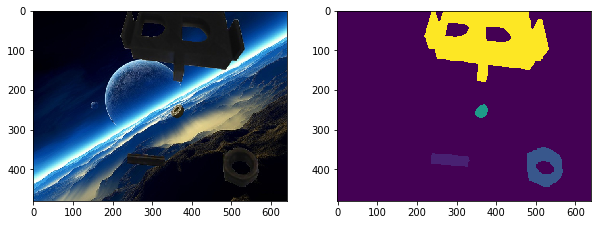

In [13]:
similar_shapes_files = get_file_paths(SIMILAR_SHAPES_TRAIN)
plot_sample(similar_shapes_files, img_number=20)

In [14]:
label_def_size_invariant = {'background': 0, 'f20_20_B': 1, 's40_40_B': 1, 'f20_20_G': 2, 's40_40_G': 2, 
                        'm20_100': 3, 'm20': 4, 'm30': 4, 'r20': 5, 'bearing_box_ax01': 6, 'bearing_box_ax16': 6, 
                        'bearing': 7, 'axis': 8, 'distance_tube': 9, 'motor': 10, 'container_box_blue': 11, 
                        'container_box_red': 12, 'em_01': 13, 'em_02': 14}

In [15]:
SIZE_INVARIANT_TRAIN = './objects/real_augmented/training/size_invariant/'
SIZE_INVARIANT_VALIDATE = './objects/real_augmented/validation/size_invariant/'
SIZE_INVARIANT_TEST = './objects/real_augmented/test/size_invariant/'

if not os.path.isdir(SIZE_INVARIANT_TRAIN):
    os.makedirs(SIZE_INVARIANT_TRAIN)
if not os.path.isdir(SIZE_INVARIANT_VALIDATE):
    os.makedirs(SIZE_INVARIANT_VALIDATE)
if not os.path.isdir(SIZE_INVARIANT_TEST):
    os.makedirs(SIZE_INVARIANT_TEST)
create_variant_labels(train_files, SIZE_INVARIANT_TRAIN, variant_type='size_invariant')
create_variant_labels(validation_files, SIZE_INVARIANT_VALIDATE, variant_type='size_invariant')
create_variant_labels(test_files, SIZE_INVARIANT_TEST, variant_type='size_invariant')

Classes in image:  [ 0  1  4  7 13]


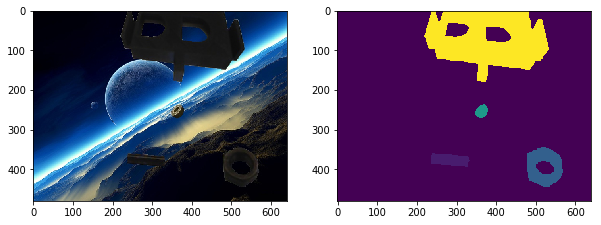

In [16]:
size_invariant_files = get_file_paths(SIZE_INVARIANT_TRAIN)
plot_sample(size_invariant_files, img_number=20)